In [42]:
import pandas as pd
import numpy as np

In [43]:
df = pd.read_csv("data/silver.csv")

In [44]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [46]:
#Afficher les valeurs uniques pour chaque colonne catégorielle et booléenne
for col in df.columns:
    if df[col].dtype == "object":
        print(col, df[col].unique())
    else:
        print(col, df[col].unique())

    




gender ['Female' 'Male']
SeniorCitizen ['No' 'Yes']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [  29.8

In [47]:
# Liste des colonnes des services internet
internet_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Créer la nouvelle colonne 'nb_service_internet'
df['nb_service_internet'] = df[internet_services].applymap(lambda x: 1 if x == 'Yes' else 0).sum(axis=1)

# Enregistrer le dataframe modifié dans un nouveau fichier CSV
df.to_csv('gold.csv', index=False)

In [48]:
df_intert = pd.read_csv("gold.csv")

In [49]:
df_intert.value_counts("nb_service_internet")

nb_service_internet
0    2219
3    1118
2    1033
1     966
4     852
5     571
6     284
dtype: int64

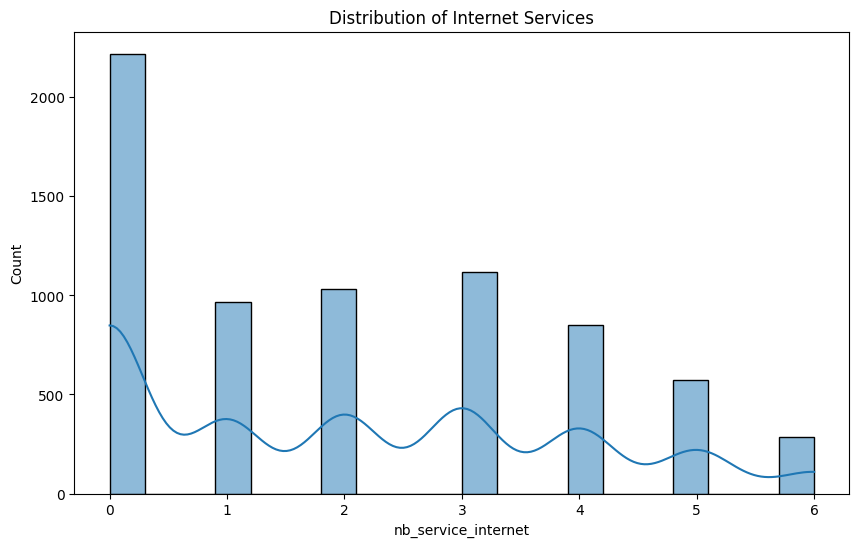

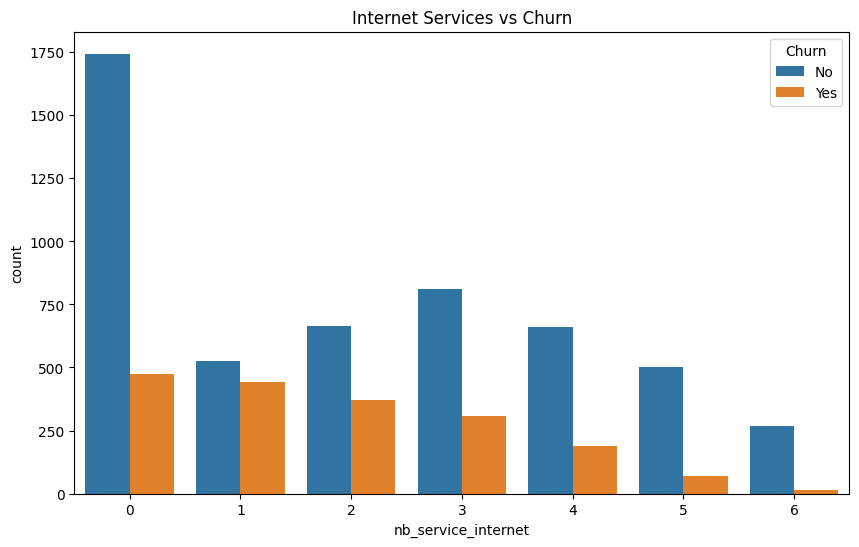

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
# Analyse univariée de 'nb_service_internet'
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='nb_service_internet', kde=True)
plt.title('Distribution of Internet Services')
plt.show()

# Analyse bivariée de 'nb_service_internet' avec 'Churn'
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='nb_service_internet', hue='Churn')
plt.title('Internet Services vs Churn')
plt.show() 

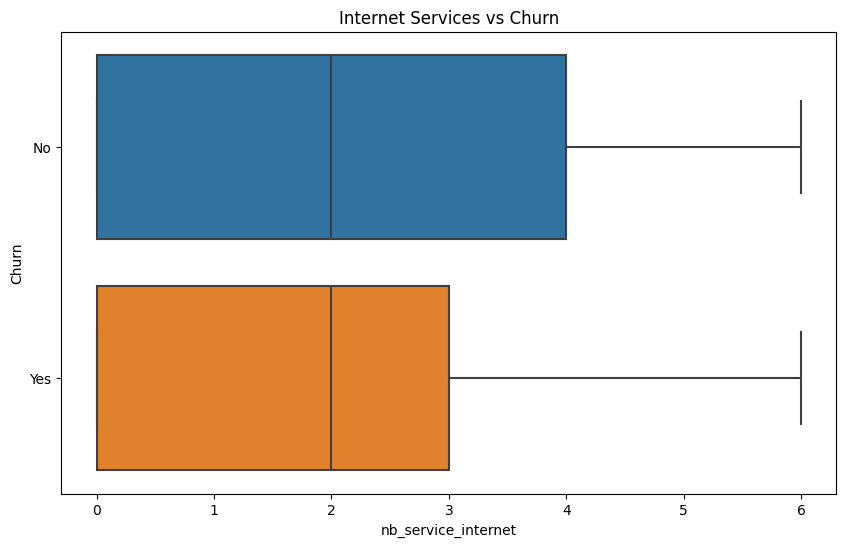

In [51]:
# boxplot de 'nb_service_internet' avec 'Churn'
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='nb_service_internet', y='Churn')
plt.title('Internet Services vs Churn')
plt.show()

In [52]:
df = df.drop(['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,nb_service_internet
0,Female,No,Yes,No,1,No,No phone service,DSL,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,Male,No,No,No,34,Yes,No,DSL,One year,No,Mailed check,56.95,1889.50,No,2
2,Male,No,No,No,2,Yes,No,DSL,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2
3,Male,No,No,No,45,No,No phone service,DSL,One year,No,Bank transfer (automatic),42.30,1840.75,No,3
4,Female,No,No,No,2,Yes,No,Fiber optic,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,One year,Yes,Mailed check,84.80,1990.50,No,5
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,One year,Yes,Credit card (automatic),103.20,7362.90,No,4
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Month-to-month,Yes,Electronic check,29.60,346.45,No,1
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0


In [53]:
# gold csv
df.to_csv('data/gold.csv', index=False)